# EDA on jupyter

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from docopt import docopt

alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

## Research Question

The analysis will focus on answering the following inferential research questions:

- Do secondary school students who are in a relationship have different grades for Maths than students who are not?
- Do secondary school students who are in a relationship have different grades for Portugese than students who are not?

## Theme setting for altair

In [2]:
def mds_special():
    font = "Arial"
    axisColor = "#000000"
    gridColor = "#DEDDDD"
    return {
        
        "config": {
            "title": {
                "fontSize": 24,
                "font": font,
                "anchor": "start", # equivalent of left-aligned.
                "fontColor": "#000000"
            },
            "background": "white",
            "axisX": {
                "domain": True,
                #"domainColor": axisColor,
                "gridColor": gridColor,
                "domainWidth": 1,
                "grid": False,
                "labelFont": font,
                "labelFontSize": 12,
                "labelAngle": 0, 
                #"tickColor": axisColor,
                "tickSize": 5, # default, including it just to show you can change it
                #"titleFont": font,
                "titleFontSize": 18,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "X Axis Title (units)", 
            },
            "axisY": {
                "domain": False,
                "grid": True,
                "gridColor": gridColor,
                "gridWidth": 1,
                "labelFont": font,
                "labelFontSize": 12,
                "labelAngle": 0, 
                #"ticks": False, # even if you don't have a "domain" you need to turn these off.
                "titleFont": font,
                "titleFontSize": 18,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "Y Axis Title (units)", 
                # titles are by default vertical left of axis so we need to hack this 
                #"titleAngle": 0, # horizontal
                #"titleY": -10, # move it up
                #"titleX": 18, # move it to the right so it aligns with the labels 
            },
                }
            }
    
# register the custom theme under a chosen name
alt.themes.register('mds_special', mds_special)

# enable the newly registered theme
alt.themes.enable('mds_special')

ThemeRegistry.enable('mds_special')

## Read data

In [3]:
df_mat = pd.read_csv("../data/student-mat.csv", sep = ";")
df_por = pd.read_csv("../data/student-por.csv", sep = ";")

#### Head and tail of math dataset

In [4]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df_mat.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


#### Head and tail of Portuguese dataset

In [16]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,g_total
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,22
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,31
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,37
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,42
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,37


In [18]:
df_por.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,g_total
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,31
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,46
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,32
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,30
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,4,10,11,11,32


#### compute `g_total`, total of all three grades

In [8]:
df_mat["g_total"] = df_mat['G1'] + df_mat['G2'] + df_mat['G3']
df_por["g_total"] = df_por['G1'] + df_por['G2'] + df_por['G3']

## Statistics on the features of interest

In [9]:
df_mat.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

> No null values

In [19]:
print("{} math students were in relationships and {} were not.".format(
    df_mat['romantic'].value_counts()['yes'], 
    df_mat['romantic'].value_counts()['no']))

print("{} portuguese language students were in relationships and {} were not.".format(
    df_por['romantic'].value_counts()['yes'], 
    df_por['romantic'].value_counts()['no']))

132 math students were in relationships and 263 were not.
239 portuguese language students were in relationships and 410 were not.


In [20]:
print("The average total grade for math students in relationships was: {:.2f}/60".format(
    df_mat[df_mat['romantic'] == 'yes']['g_total'].mean()))
print("The average total grade for math students not in relationships was: {:.2f}/60".format(
    df_mat[df_mat['romantic'] == 'no']['g_total'].mean()))
print("The average total grade for portuguese students in relationships was: {:.2f}/60".format(
    df_por[df_por['romantic'] == 'yes']['g_total'].mean()))
print("The average total grade for portuguese students not in relationships was: {:.2f}/60".format(
    df_por[df_por['romantic'] == 'no']['g_total'].mean()))

The average total grade for math students in relationships was: 30.43/60
The average total grade for math students not in relationships was: 32.84/60
The average total grade for portuguese students in relationships was: 33.85/60
The average total grade for portuguese students not in relationships was: 35.47/60


## Plots

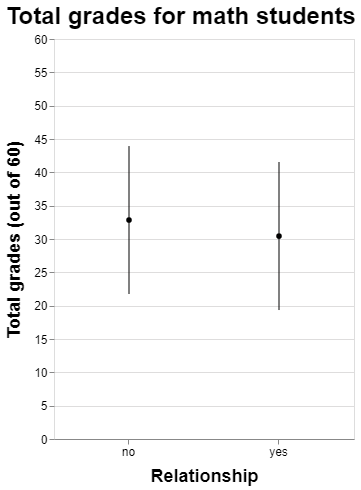

In [21]:
error_bars = alt.Chart(df_mat).mark_errorbar(extent='stdev').encode(
  y=alt.Y('g_total:Q', 
          scale=alt.Scale(domain = (0, 60)),
         title = "Total grades (out of 60)"),
  x=alt.X('romantic:N',
         title = "Relationship")
)
points = alt.Chart(df_mat).mark_point(filled=True, color='black').encode(
  y=alt.Y('g_total:Q', aggregate='mean'),
  x=alt.X('romantic:N'),
)

(error_bars + points).properties(
    width = 300,
    height = 400,
    title = "Total grades for math students"
)

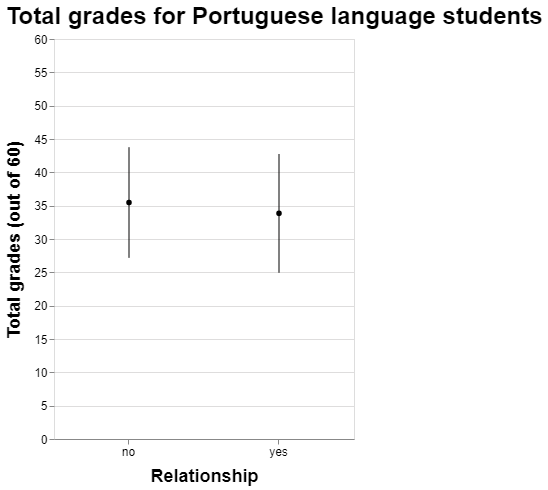

In [22]:
error_bars = alt.Chart(df_por).mark_errorbar(extent='stdev').encode(
  y=alt.Y('g_total:Q', 
          scale=alt.Scale(domain = (0, 60)),
         title = "Total grades (out of 60)"),
  x=alt.X('romantic:N',
         title = "Relationship")
)
points = alt.Chart(df_por).mark_point(filled=True, color='black').encode(
  y=alt.Y('g_total:Q', aggregate='mean'),
  x=alt.X('romantic:N'),
)

(error_bars + points).properties(
    width = 300,
    height = 400,
    title = "Total grades for Portuguese language students"
)